<a href="https://colab.research.google.com/github/huy20146177/baitapAI/blob/main/btvn5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=24919cb08ffb3b4ea516ad469099814dc0145f897f6dfda3b3968f1985c1b701
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

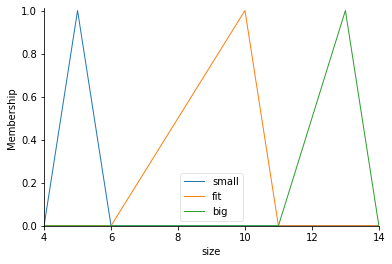

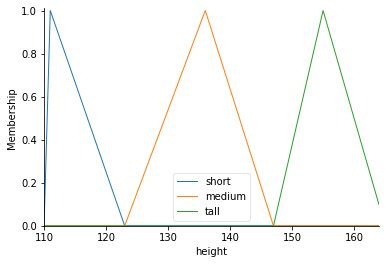

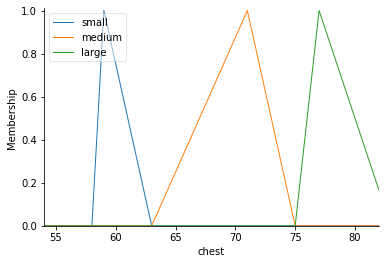

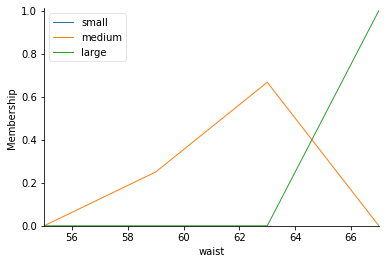

In [5]:
height = ctrl.Antecedent(np.arange(110, 165, 1), 'height')
chest = ctrl.Antecedent(np.arange(54, 83, 1), 'chest')
waist = ctrl.Antecedent(np.arange(55, 68, 4), 'waist')
size = ctrl.Consequent(np.arange(4, 15 , 1), 'size')


size['small'] = fuzz.trimf(size.universe, [4, 5, 6])
size['fit'] = fuzz.trimf(size.universe, [6, 10, 11])
size['big'] = fuzz.trimf(size.universe, [11, 13, 14])
size.view()

height['short'] = fuzz.trimf(height.universe, [110, 111, 123])
height['medium'] = fuzz.trimf(height.universe, [123, 136, 147])
height['tall'] = fuzz.trimf(height.universe, [147, 155,165])
height.view()

chest['small'] = fuzz.trimf(chest.universe, [58, 59, 63])
chest['medium'] = fuzz.trimf(chest.universe, [63, 71, 75])
chest['large'] = fuzz.trimf(chest.universe, [75, 77, 83])
chest.view()

waist['small'] = fuzz.trimf(waist.universe, [55, 56, 58])
waist['medium'] = fuzz.trimf(waist.universe, [58, 62, 65])
waist['large'] = fuzz.trimf(waist.universe, [65, 67, 68])
waist.view()

8.573684210526315


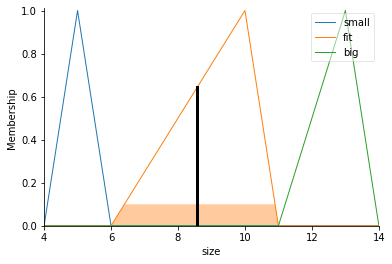

In [9]:
rule1 = ctrl.Rule(height['short'] & chest['small'] & waist['small'], size['small'])
rule2 = ctrl.Rule(height['short'] & chest['small'] & waist['medium'], size['small'])
rule3 = ctrl.Rule(height['short'] & chest['small'] & waist['large'], size['fit'])
rule4 = ctrl.Rule(height['short'] & chest['medium'] & waist['small'], size['small'])
rule5 = ctrl.Rule(height['short'] & chest['medium'] & waist['medium'], size['fit'])
rule6 = ctrl.Rule(height['short'] & chest['medium'] & waist['large'], size['small'])
rule7 = ctrl.Rule(height['short'] & chest['large'] & waist['small'], size['fit'])
rule8 = ctrl.Rule(height['short'] & chest['large'] & waist['medium'], size['small'])
rule9 = ctrl.Rule(height['short'] & chest['large'] & waist['large'], size['fit'])
rule10 = ctrl.Rule(height['medium'] & chest['small'] & waist['small'], size['small'])
rule11 = ctrl.Rule(height['medium'] & chest['small'] & waist['medium'], size['fit'])
rule12 = ctrl.Rule(height['medium'] & chest['small'] & waist['large'], size['small'])
rule13 = ctrl.Rule(height['medium'] & chest['medium'] & waist['small'], size['fit'])
rule14 = ctrl.Rule(height['medium'] & chest['medium'] & waist['medium'], size['fit'])
rule15 = ctrl.Rule(height['medium'] & chest['medium'] & waist['large'], size['big'])
rule16 = ctrl.Rule(height['medium'] & chest['large'] & waist['small'], size['fit'])
rule17 = ctrl.Rule(height['medium'] & chest['large'] & waist['medium'], size['big'])
rule18 = ctrl.Rule(height['medium'] & chest['large'] & waist['large'], size['big'])
rule19 = ctrl.Rule(height['tall'] & chest['small'] & waist['small'], size['small'])
rule20 = ctrl.Rule(height['tall'] & chest['small'] & waist['medium'], size['fit'])
rule21 = ctrl.Rule(height['tall'] & chest['small'] & waist['large'], size['fit'])
rule22 = ctrl.Rule(height['tall'] & chest['medium'] & waist['small'], size['small'])
rule23 = ctrl.Rule(height['tall'] & chest['medium'] & waist['medium'], size['fit'])
rule24 = ctrl.Rule(height['tall'] & chest['medium'] & waist['large'], size['big'])
rule25 = ctrl.Rule(height['tall'] & chest['large'] & waist['small'], size['fit'])
rule26 = ctrl.Rule(height['tall'] & chest['large'] & waist['medium'], size['big'])
rule27 = ctrl.Rule(height['tall'] & chest['large'] & waist['large'], size['big'])

size_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule9,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27])
sizing= ctrl.ControlSystemSimulation(size_ctrl)
sizing.input['height'] = 170
sizing.input['chest'] = 65
sizing.input['waist'] = 60

sizing.compute()
print(sizing.output['size'])
size.view(sim=sizing)